<a href="https://colab.research.google.com/github/park-geun-hyeong/first_deeplearning_fromkeras/blob/main/text_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import keras 
from keras.datasets import reuters
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=100,test_split=0.2)
print(len(x_train))
print(len(x_test))

8982
2246


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [50]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]


In [51]:
reuters_word_idx=reuters.get_word_index()
print(len(reuters_word_idx))

30979


In [52]:
r_word_idx= dict([(value,key)for(key,value)in reuters_word_idx.items()])
for i in range(1,6):
    print(r_word_idx[i])

the
of
to
in
said


In [53]:
for key in x_train[0]:
    print(r_word_idx[key], end=' ')

the of of mln loss for of said at of of said of of 1 of of april 0 a after said from of and from of 000 april 0 prices its of year a but in this mln of an of of and of and revs vs 000 its of vs 000 a but 3 of of of and of and of vs 000 its of 4 vs 000 1 mln of of april 0 are 2 of will billion of and of 000 pct dlrs 

In [54]:
from keras.utils.np_utils import to_categorical
y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)

print(y_train[0])
print(y_train_oh[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [55]:
def vectorize_sequence(sequences, dimension=100):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [56]:
x_train_vec=vectorize_sequence(x_train)
x_test_vec=vectorize_sequence(x_test)

print(x_train[0])
print(x_train_vec[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [57]:
inputs=Input(shape=(100,))
outputs=Dense(46,activation='softmax')(inputs)

model_v1=Model(inputs,outputs)

model_v1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [58]:
history=model_v1.fit(x_train_vec, y_train_oh, batch_size=32,epochs=30,verbose=1,validation_split=0.1)

Epoch 1/30
253/253 [==============================] - 1s 2ms/step - loss: 3.0354 - accuracy: 0.2411 - val_loss: 2.0353 - val_accuracy: 0.5017
Epoch 2/30
253/253 [==============================] - 0s 1ms/step - loss: 1.8303 - accuracy: 0.5534 - val_loss: 1.7652 - val_accuracy: 0.5951
Epoch 3/30
253/253 [==============================] - 0s 1ms/step - loss: 1.5595 - accuracy: 0.6147 - val_loss: 1.6582 - val_accuracy: 0.6329
Epoch 4/30
253/253 [==============================] - 0s 1ms/step - loss: 1.4592 - accuracy: 0.6432 - val_loss: 1.5876 - val_accuracy: 0.6407
Epoch 5/30
253/253 [==============================] - 0s 1ms/step - loss: 1.4011 - accuracy: 0.6617 - val_loss: 1.5544 - val_accuracy: 0.6618
Epoch 6/30
253/253 [==============================] - 0s 1ms/step - loss: 1.3445 - accuracy: 0.6824 - val_loss: 1.5242 - val_accuracy: 0.6741
Epoch 7/30
253/253 [==============================] - 0s 1ms/step - loss: 1.2371 - accuracy: 0.7018 - val_loss: 1.5052 - val_accuracy: 0.6741
Epoch 

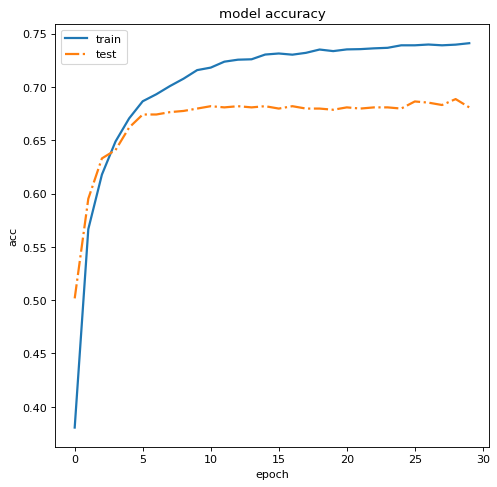

In [59]:
plt.figure(figsize=(7,7),dpi=80, facecolor='w',edgecolor='k')
plt.plot(history.history['accuracy'],'-',linewidth=2)

plt.plot(history.history['val_accuracy'],'-.',linewidth=2)
plt.title('model accuracy')
plt.xlabel("epoch")
plt.ylabel('acc')
plt.legend(['train','test'],loc='upper left')
plt.show()

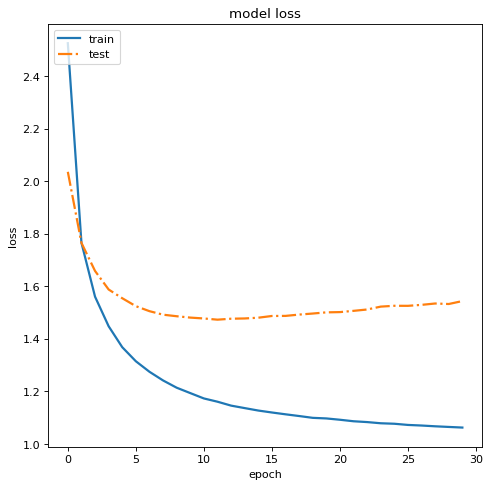

In [60]:
plt.figure(figsize=(7,7),dpi=80, facecolor='w',edgecolor='k')
plt.plot(history.history['loss'],'-',linewidth=2)

plt.plot(history.history['val_loss'],'-.',linewidth=2)
plt.title('model loss')
plt.xlabel("epoch")
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()   #4번째 epoch 부터는 train data에 대해서만 성능이 좋아지고 validation data에대해서는 성능이 낮아지거나 그대로다.즉 과적합 상태이다. 그러므로 epoch를 4로 하는것이 좋다.

In [61]:
score=model_v1.evaluate(x_test_vec,y_test_oh,batch_size=32,verbose=1)
print('test score:',np.round(score[0],3))
print('test accuracy:',np.round(score[1],3))

71/71 [==============================] - 0s 926us/step - loss: 1.4936 - accuracy: 0.6799
test score: 1.494
test accuracy: 0.68


In [62]:
def get_model(input_shape):
    inputs=Input(shape=(input_shape,))
    hidden1=Dense(256,activation='relu')(inputs)
    dropout=Dropout(0.5)(hidden1)
    outputs=Dense(46,activation='softmax')(dropout)
    
    model=Model(inputs,outputs)
    return model


In [63]:
model_v2=get_model(100)
model_v2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_2=model_v2.fit(x_train_vec,y_train_oh, batch_size=32, epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
225/225 [==============================] - 1s 3ms/step - loss: 2.3775 - accuracy: 0.4456 - val_loss: 1.5054 - val_accuracy: 0.6566
Epoch 2/30
225/225 [==============================] - 0s 2ms/step - loss: 1.5340 - accuracy: 0.6265 - val_loss: 1.3649 - val_accuracy: 0.6767
Epoch 3/30
225/225 [==============================] - 0s 2ms/step - loss: 1.4031 - accuracy: 0.6521 - val_loss: 1.3014 - val_accuracy: 0.6873
Epoch 4/30
225/225 [==============================] - 0s 2ms/step - loss: 1.2702 - accuracy: 0.6788 - val_loss: 1.2746 - val_accuracy: 0.6873
Epoch 5/30
225/225 [==============================] - 0s 2ms/step - loss: 1.2351 - accuracy: 0.6774 - val_loss: 1.2428 - val_accuracy: 0.6956
Epoch 6/30
225/225 [==============================] - 0s 2ms/step - loss: 1.1894 - accuracy: 0.6949 - val_loss: 1.2272 - val_accuracy: 0.7034
Epoch 7/30
225/225 [==============================] - 0s 2ms/step - loss: 1.1080 - accuracy: 0.7081 - val_loss: 1.2251 - val_accuracy: 0.6978
Epoch 

Text(0, 0.5, 'acc')

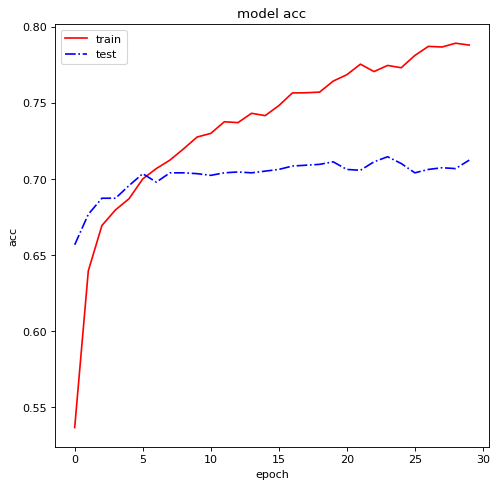

In [64]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history_2.history['accuracy'],'-',color='r')
plt.plot(history_2.history['val_accuracy'],'-.',color='b')
plt.legend(['train','test'],loc='upper left')
plt.title("model acc")
plt.xlabel('epoch')
plt.ylabel('acc')

Text(0, 0.5, 'loss')

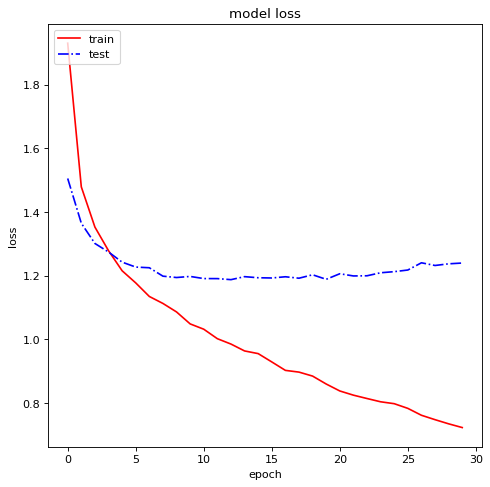

In [65]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history_2.history['loss'],'-',color='r')
plt.plot(history_2.history['val_loss'],'-.',color='b')
plt.legend(['train','test'],loc='upper left')
plt.title("model loss")
plt.xlabel('epoch')
plt.ylabel('loss')

In [66]:
score2=model_v2.evaluate(x_test_vec,y_test_oh,batch_size=32,verbose=1)
print('test score:',np.round(score2[0],3))
print('test accuracy:',np.round(score2[1],3))

71/71 [==============================] - 0s 986us/step - loss: 1.3122 - accuracy: 0.6946
test score: 1.312
test accuracy: 0.695


In [67]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000, test_split=0.2)

y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)

x_train_vec=vectorize_sequence(x_train,dimension=10000)
x_test_vec=vectorize_sequence(x_test,dimension=10000)

model=get_model(10000)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2560256   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 46)                11822     
Total params: 2,572,078
Trainable params: 2,572,078
Non-trainable params: 0
_________________________________________________________________


In [68]:
history3=model.fit(x_train_vec,y_train_oh, batch_size=32,epochs=30,verbose=1,validation_split=0.1)


Epoch 1/30
253/253 [==============================] - 5s 18ms/step - loss: 1.9191 - accuracy: 0.5895 - val_loss: 1.0100 - val_accuracy: 0.7820
Epoch 2/30
253/253 [==============================] - 5s 19ms/step - loss: 0.6154 - accuracy: 0.8675 - val_loss: 0.8833 - val_accuracy: 0.8020
Epoch 3/30
253/253 [==============================] - 5s 19ms/step - loss: 0.3462 - accuracy: 0.9207 - val_loss: 0.8765 - val_accuracy: 0.8176
Epoch 4/30
253/253 [==============================] - 5s 19ms/step - loss: 0.2199 - accuracy: 0.9508 - val_loss: 0.9240 - val_accuracy: 0.8076
Epoch 5/30
253/253 [==============================] - 4s 18ms/step - loss: 0.1962 - accuracy: 0.9543 - val_loss: 0.9202 - val_accuracy: 0.8087
Epoch 6/30
253/253 [==============================] - 5s 18ms/step - loss: 0.1873 - accuracy: 0.9524 - val_loss: 0.9775 - val_accuracy: 0.8187
Epoch 7/30
253/253 [==============================] - 4s 18ms/step - loss: 0.1655 - accuracy: 0.9583 - val_loss: 1.0186 - val_accuracy: 0.8009

In [69]:
score_3 = model.evaluate(x_test_vec,y_test_oh,batch_size=32,verbose=1)
print(score_3[0])
print(score_3[1]) 

71/71 [==============================] - 0s 5ms/step - loss: 1.3309 - accuracy: 0.7992
1.3309221267700195
0.799198567867279


Text(0, 0.5, 'acc')

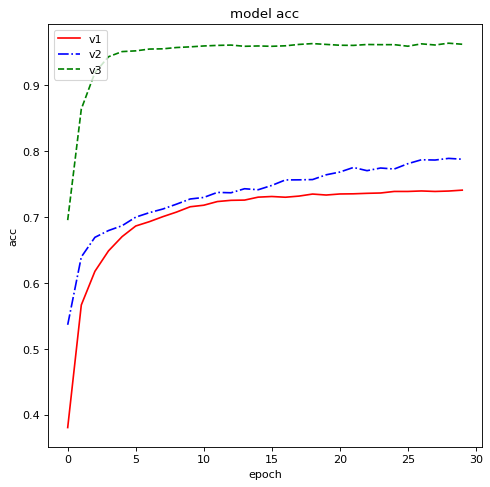

In [70]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history.history['accuracy'],'-',color='r')
plt.plot(history_2.history['accuracy'],'-.',color='b')
plt.plot(history3.history['accuracy'],'--',color='g')
plt.legend(['v1','v2','v3'],loc='upper left')
plt.title("model acc")
plt.xlabel('epoch')
plt.ylabel('acc')

Text(0, 0.5, 'acc')

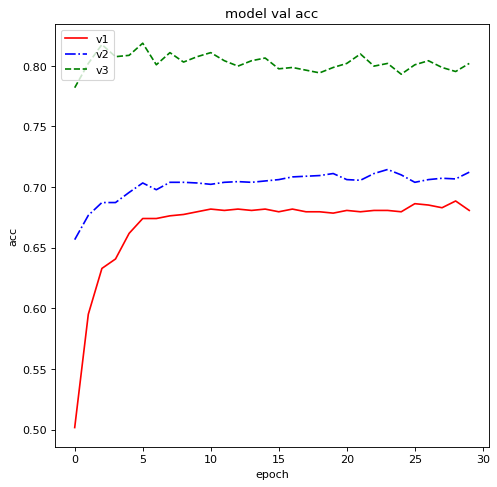

In [71]:
plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
plt.plot(history.history['val_accuracy'],'-',color='r')
plt.plot(history_2.history['val_accuracy'],'-.',color='b')
plt.plot(history3.history['val_accuracy'],'--',color='g')
plt.legend(['v1','v2','v3'],loc='upper left')
plt.title("model val acc")
plt.xlabel('epoch')
plt.ylabel('acc')

In [77]:
from keras.layers import Embedding,LSTM
from keras.optimizers import Adam
from keras.preprocessing import sequence

num_words=10000
max_words=96
batch_size=256
epochs=30

def get_lstm_model(input_shape):
    inputs=Input(shape=(input_shape,))
    inputs_emb=Embedding(num_words, input_shape)(inputs)
    hidden2=LSTM(96,dropout=0.3,recurrent_dropout=0.3, return_sequences=False, activation='tanh')(inputs_emb)
    outputs=Dense(46,activation='softmax')(hidden2)
    model=Model(inputs,outputs)

    return model


In [79]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=num_words,test_split=0.2)

y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)

x_train_seq=sequence.pad_sequences(x_train, maxlen=max_words,padding='post',truncating='post')
x_test_seq=sequence.pad_sequences(x_test,maxlen=max_words,padding='post',truncating='post')

_adam=Adam(lr=0.001)

model_v3=get_lstm_model(max_words)
model_v3.compile(loss='categorical_crossentropy',optimizer=_adam,metrics=['accuracy'])
model_v3.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 96, 96)            960000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dense_14 (Dense)             (None, 46)                4462      
Total params: 1,038,574
Trainable params: 1,038,574
Non-trainable params: 0
_________________________________________________________________


In [80]:
history_3=model_v3.fit(x_train_seq,y_train_oh,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)

Epoch 1/30
32/32 [==============================] - 24s 665ms/step - loss: 3.3811 - accuracy: 0.2825 - val_loss: 2.4424 - val_accuracy: 0.3348
Epoch 2/30
32/32 [==============================] - 21s 660ms/step - loss: 2.3714 - accuracy: 0.3555 - val_loss: 2.3215 - val_accuracy: 0.3904
Epoch 3/30
32/32 [==============================] - 21s 661ms/step - loss: 2.2147 - accuracy: 0.3859 - val_loss: 2.1163 - val_accuracy: 0.3660
Epoch 4/30
32/32 [==============================] - 21s 667ms/step - loss: 2.1200 - accuracy: 0.3791 - val_loss: 2.1039 - val_accuracy: 0.3960
Epoch 5/30
32/32 [==============================] - 21s 667ms/step - loss: 2.0079 - accuracy: 0.4250 - val_loss: 1.9682 - val_accuracy: 0.5128
Epoch 6/30
32/32 [==============================] - 21s 658ms/step - loss: 1.8943 - accuracy: 0.5152 - val_loss: 2.0027 - val_accuracy: 0.4494
Epoch 7/30
32/32 [==============================] - 21s 659ms/step - loss: 2.2745 - accuracy: 0.4027 - val_loss: 2.3567 - val_accuracy: 0.3571

In [84]:
score_3= model_v3.evaluate(x_test_seq,y_test_oh,batch_size=32,verbose=1)
np.round(score_3,3)

71/71 [==============================] - 2s 23ms/step - loss: 1.5086 - accuracy: 0.6202


array([1.509, 0.62 ])

In [85]:
from keras.layers import Bidirectional
def get_bilstm_model(input_shape):
    inputs=Input(shape=(input_shape,))
    inputs_emb=Embedding(num_words,input_shape)(inputs)
    hidden=Bidirectional(LSTM(96,dropout=0.3,recurrent_dropout=0.3,return_sequences=False,activation='tanh'))(inputs_emb)
    outputs=Dense(46,activation='softmax')(hidden)

    model=Model(inputs,outputs)
    return model

In [86]:
model_v4=get_bilstm_model(max_words)
model_v4.compile(loss='categorical_crossentropy',optimizer=_adam,metrics=['accuracy'])
model_v4.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 96, 96)            960000    
_________________________________________________________________
bidirectional (Bidirectional (None, 192)               148224    
_________________________________________________________________
dense_15 (Dense)             (None, 46)                8878      
Total params: 1,117,102
Trainable params: 1,117,102
Non-trainable params: 0
_________________________________________________________________


In [87]:
history_4=model_v4.fit(x_train_seq,y_train_oh,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)

Epoch 1/30
32/32 [==============================] - 46s 1s/step - loss: 2.9236 - accuracy: 0.3158 - val_loss: 1.7725 - val_accuracy: 0.5606
Epoch 2/30
32/32 [==============================] - 41s 1s/step - loss: 1.6068 - accuracy: 0.6066 - val_loss: 1.4028 - val_accuracy: 0.6630
Epoch 3/30
32/32 [==============================] - 41s 1s/step - loss: 1.2322 - accuracy: 0.7014 - val_loss: 1.2138 - val_accuracy: 0.7075
Epoch 4/30
32/32 [==============================] - 41s 1s/step - loss: 0.8851 - accuracy: 0.7848 - val_loss: 1.1103 - val_accuracy: 0.7364
Epoch 5/30
32/32 [==============================] - 41s 1s/step - loss: 0.7352 - accuracy: 0.8261 - val_loss: 1.0699 - val_accuracy: 0.7664
Epoch 6/30
32/32 [==============================] - 41s 1s/step - loss: 0.6034 - accuracy: 0.8576 - val_loss: 1.0344 - val_accuracy: 0.7631
Epoch 7/30
32/32 [==============================] - 42s 1s/step - loss: 0.4728 - accuracy: 0.8901 - val_loss: 1.0334 - val_accuracy: 0.7764
Epoch 8/30
32/32 [==

In [88]:
score_4=model_v4.evaluate(x_test_seq,y_test_oh,batch_size=batch_size,verbose=1)
print(np.round(score_4,3))

9/9 [==============================] - 2s 210ms/step - loss: 1.3076 - accuracy: 0.7756
[1.308 0.776]


In [91]:
from keras.layers import Conv1D,MaxPooling1D

def get_cnn_lstm_model(input_shape):
    inputs=Input(shape=(input_shape,))
    inputs_emb=Embedding(num_words, input_shape)(inputs)
    conv1=Conv1D(48,3,padding='same',activation='relu')(inputs_emb)
    pool1=MaxPooling1D(pool_size=3)(conv1)
    drop=Dropout(0.25)(pool1)
    lstm=Bidirectional(LSTM(48,dropout=0.3,recurrent_dropout=0.3,return_sequences=False,activation='tanh'))(drop)
    outputs=Dense(46,activation='softmax')(lstm)

    model=Model(inputs,outputs)

    return model

model_v5=get_cnn_lstm_model(max_words)


In [92]:
model_v5.compile(loss='categorical_crossentropy',optimizer=_adam,metrics=['acc'])
model_v5.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 96, 96)            960000    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 48)            13872     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 32, 48)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 48)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 96)                37248     
_________________________________________________________________
dense_16 (Dense)             (None, 46)                446

In [94]:
history_5 = model_v5.fit(x_train_seq,y_train_oh, epochs=epochs,batch_size=batch_size, verbose=1)


Epoch 1/30
36/36 [==============================] - 14s 260ms/step - loss: 2.8245 - acc: 0.3546
Epoch 2/30
36/36 [==============================] - 9s 260ms/step - loss: 1.6590 - acc: 0.5852
Epoch 3/30
36/36 [==============================] - 10s 265ms/step - loss: 1.4339 - acc: 0.6560
Epoch 4/30
36/36 [==============================] - 9s 262ms/step - loss: 1.2047 - acc: 0.7120
Epoch 5/30
36/36 [==============================] - 10s 273ms/step - loss: 1.0309 - acc: 0.7480
Epoch 6/30
36/36 [==============================] - 10s 278ms/step - loss: 0.8466 - acc: 0.7867
Epoch 7/30
36/36 [==============================] - 10s 281ms/step - loss: 0.7686 - acc: 0.8121
Epoch 8/30
36/36 [==============================] - 10s 272ms/step - loss: 0.6764 - acc: 0.8360
Epoch 9/30
36/36 [==============================] - 10s 273ms/step - loss: 0.5928 - acc: 0.8559
Epoch 10/30
36/36 [==============================] - 10s 277ms/step - loss: 0.5176 - acc: 0.8763
Epoch 11/30
36/36 [======================

In [96]:
score_5=model_v5.evaluate(x_test_seq,y_test_oh,batch_size=batch_size,verbose=1)
print(np.round(score_5,5))

9/9 [==============================] - 0s 41ms/step - loss: 1.2853 - acc: 0.7698
[1.2853  0.76981]
